In [72]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from PIL import Image
import numpy as np
import os
import re

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import PReLU
from keras.layers.convolutional import Convolution2D, MaxPooling2D,ZeroPadding2D
from keras.optimizers import SGD, Adadelta, Adagrad, Adam
from keras.utils import np_utils, generic_utils
from keras.regularizers import l2
from keras import backend as K
from six.moves import range
import sys
import random
import matplotlib.pyplot as plt

from utils import process_one_image_v2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
image_adr = '1-00862_BH7KVCBBXX_L005_001.bwamem.mkdup.bam,1-00862-01_AH7JGLBBXX_L004_001.bwamem.mkdup.bam,1-00862-02_AH7FMTBBXX_L002_001.bwamem.mkdup.bam.1.24417440.png'
#image_adr = 'CG0001-6447_Illumina.bam,CG0001-6438_Illumina.bam,CG0001-6431_Illumina.bam.12.7736863.png'
image_adr = 'CG0000-4060_Illumina.bam,CG0023-9135_Illumina.bam,CG0023-9151_Illumina.bam.15.20556189.png'
n_block = 1
new_width, new_height = 3000, 1280
img = process_one_image_v2(image_adr, n_block, new_width, new_height)

1811 1901 1723 1991
[  0   0   0  64 250 250 250 250 250 250 250 250 250 250 250 250 250 250
 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250
 250 250 250 250 250 250 250 128 250 250 250 250 250 250 250 250 250 200
  74  74  74 200 200 200 200 200 200 200 200 200  74  74  74 165 165 200
 200 200 200 200 200 200  74  74  74  74  74 200 200 200 200 200 200 200
  74  74  74 200 200 200 200 200 200 200  74  74  74 200 200 165 165 200
 200 200 200 200 200 200 200 200 200 200 200 200  74  74  74 200 200 200
 200 200  74  74  74 200 200 200 200 200 200 200 200 200 200 200  74  74
  74 200 200 200 200 200  74  74  74  97  97 250 250 250 250 250 250 250
 250 250 250 200 200 200 200 200 200 200  74  74  74 200 200 200 200 200
 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200 200
 200 200 200 200 200 200 200 200 200  44  44 200 200 200  74  74  74 200
 200 200  74  74  74  74  74 200 200 200 200 200  74  74  74 200  74  74
  74 186  74  74  74 200 200 20

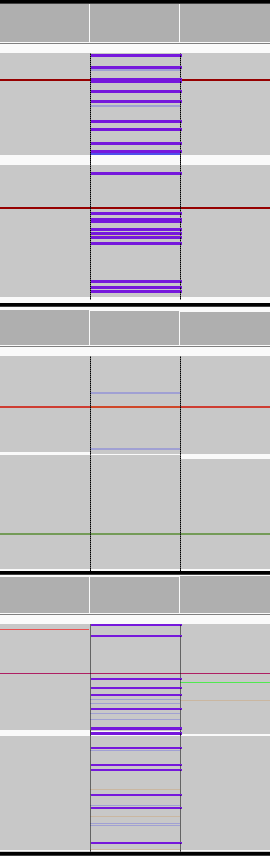

In [74]:
#print width, height, (black_left, top, black_right, bottom), img.size
img

In [7]:
img_grey = img.convert('L')
image_data = np.array(img_grey)

In [8]:
list(image_data)

[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([16, 16, 16, ..., 16, 16, 16], dtype=uint8),
 array([39, 39, 39, ..., 39, 39, 39], dtype=uint8),
 array([63, 63, 63, ..., 63, 63, 63], dtype=uint8),
 array([129, 129, 129, ..., 129, 129, 129], dtype=uint8),
 array([197, 197, 197, ..., 197, 197, 197], dtype=uint8),
 array([250, 250, 250, ..., 250, 250, 250], dtype=uint8),
 array([250, 250, 250, ..., 250, 250, 250], dtype=uint8),
 array([250, 250, 250, ..., 250, 250, 250], dtype=uint8),
 array([237, 237, 237, ..., 250, 250, 250], dtype=uint8),
 array([209, 209, 209, ..., 250, 250, 250], dtype=uint8),
 array([182, 182, 182, ..., 250, 250, 250], dtype=uint8),
 array([175, 175, 175, ..., 250, 250, 250], dtype=uint8),
